In [ ]:
# Annotated follow-along guide: Construct a Naive Bayes model with Python

In [1]:
# Import statements

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import recall_score, precision_score,f1_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



In [2]:
# Read in the data
churn_df = pd.read_csv(r"D:\VSCODE\Machine Learning\churn_df.csv")
churn_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Loyalty,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0.047619,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0.024390,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0.190476,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0.025641,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0.046512,0,1


In [3]:
# Check class balance
churn_df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [4]:
# Drop Tenure and Age variables
churn_df = churn_df.drop(['Tenure', 'Age'], axis=1)
churn_df.head()

,CreditScore,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Loyalty,Geography_Germany,Geography_Spain
0,619,0.00,1,1,1,101348.88,1,0.047619,0,0
1,608,83807.86,1,0,1,112542.58,0,0.024390,0,1
2,502,159660.80,3,1,0,113931.57,1,0.190476,0,0
3,699,0.00,2,0,0,93826.63,0,0.025641,0,0
4,850,125510.82,1,1,1,79084.10,0,0.046512,0,1


In [8]:
# Split the data
# Define the y (target) variable
y = churn_df['Exited']

# Define the X (predictor) variables
X = churn_df.copy()
X = X.drop('Exited', axis=1)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [9]:
# Modeling
# Unscaled data 

# Fit the model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Get the predictions on test data
y_preds = gnb.predict(X_test)

In [17]:
# Now we can check how our model performs using the evaluation metrics we imported.

print('Accuracy: ', '%.3f' % accuracy_score(y_test, y_preds))
print('Precision:', '%.3f' % precision_score(y_test, y_preds))
print('Recall:', '%.3f' % recall_score(y_test, y_preds))
print('F1 Score:', '%.3f' % f1_score(y_test, y_preds))

Accuracy:  0.796
Precision: 0.000
Recall: 0.000
F1 Score: 0.000


c:\Users\foggd\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [18]:
# Check unique values in predictions
np.unique(y_preds)


array([0])

In [ ]:
# This confirms that the model predicted 0 (not churned) for every sample in the test data.

In [19]:
# Get descriptive stats for data
X.describe()


,CreditScore,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Loyalty,Geography_Germany,Geography_Spain
count,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.137936,0.250900,0.247700
std,96.653299,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.089506,0.433553,0.431698
min,350.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000
25%,584.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.064516,0.000000,0.000000
50%,652.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.129032,0.000000,0.000000
75%,718.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.200000,1.000000,0.000000
max,850.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,0.555556,1.000000,1.000000


In [20]:
# Scaled data
# Import the scaler function
from sklearn.preprocessing import MinMaxScaler

# Instantiate the scaler
scaler = MinMaxScaler()

# Fit the scaler to the training data
scaler.fit(X_train)

# Scale the training data
X_train = scaler.transform(X_train)

# Scale the test data
X_test = scaler.transform(X_test)

In [21]:
# Now we'll repeat the steps to fit our model, only this time we'll fit it to our new scaled data.

# Fit the model
gnb_scaled = GaussianNB()
gnb_scaled.fit(X_train, y_train)

# Get the predictions on test data
scaled_preds = gnb_scaled.predict(X_test)

In [22]:
print('Accuracy: ', '%.3f' % accuracy_score(y_test, scaled_preds))
print('Precision:', '%.3f' % precision_score(y_test, scaled_preds))
print('Recall:', '%.3f' % recall_score(y_test, scaled_preds))
print('F1 Score:', '%.3f' % f1_score(y_test, scaled_preds))

Accuracy:  0.806
Precision: 0.544
Recall: 0.303
F1 Score: 0.389


In [23]:
# Evaluation
def conf_matrix_plot(model, x_data, y_data):
    '''
    Accepts as argument model object, X data (test or validate), and y data (test or validate). 
    Return a plot of confusion matrix for predictions on y data.
    ''' 
  
    model_pred = model.predict(x_data)
    cm = confusion_matrix(y_data, model_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=model.classes_,
                                 )
  
    disp.plot(values_format='') # `values_format=''` suppresses scientific notation
    plt.show()

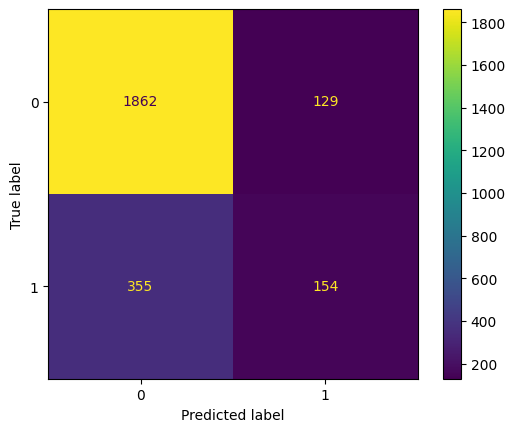

In [24]:
conf_matrix_plot(gnb_scaled, X_test, y_test)

In [36]:
# Activity_Build a Naive Bayes model
# Import statements

import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn import metrics


In [37]:
# Import the data
extracted_data = pd.read_csv(r"D:\VSCODE\Machine Learning\extracted_nba_players_data.csv")

In [38]:
# Display the first 10 rows of data.
extracted_data.head(10)


,fg,3p,ft,reb,ast,stl,blk,tov,target_5yrs,total_points,efficiency
0,34.7,25.0,69.9,4.1,1.9,0.4,0.4,1.3,0,266.4,0.270073
1,29.6,23.5,76.5,2.4,3.7,1.1,0.5,1.6,0,252.0,0.267658
2,42.2,24.4,67.0,2.2,1.0,0.5,0.3,1.0,0,384.8,0.339869
3,42.6,22.6,68.9,1.9,0.8,0.6,0.1,1.0,1,330.6,0.491379
4,52.4,0.0,67.4,2.5,0.3,0.3,0.4,0.8,1,216.0,0.391304
5,42.3,32.5,73.2,0.8,1.8,0.4,0.0,0.7,0,277.5,0.324561
6,43.5,50.0,81.1,2.0,0.6,0.2,0.1,0.7,1,409.2,0.605505
7,41.5,30.0,87.5,1.7,0.2,0.2,0.1,0.7,1,273.6,0.553398
8,39.2,23.3,71.4,0.8,2.3,0.3,0.0,1.1,0,156.0,0.242424
9,38.3,21.4,67.8,1.1,0.3,0.2,0.0,0.7,0,155.4,0.435294


In [39]:
# Model preparation
# Isolate your target and predictor variables

# define the y (target) variable
y = extracted_data['target_5yrs']

# Define the X (predictor) variables.

X = extracted_data.drop('target_5yrs', axis = 1)


In [40]:
# Display the first 10 rows of your target data
y.head(10)

0    0
1    0
2    0
3    1
4    1
5    0
6    1
7    1
8    0
9    0
Name: target_5yrs, dtype: int64

In [41]:
'''Question: What do you observe about the your target variable?

Given that the target variable contains both 1 and 0 indicates that it is binary and requires a model suitable for binary classification.'''

'Question: What do you observe about the your target variable?\n\nGiven that the target variable contains both 1 and 0 indicates that it is binary and requires a model suitable for binary classification.'

In [42]:
# Dislay the first 10 rows of your predictor variables

X.head(10)

,fg,3p,ft,reb,ast,stl,blk,tov,total_points,efficiency
0,34.7,25.0,69.9,4.1,1.9,0.4,0.4,1.3,266.4,0.270073
1,29.6,23.5,76.5,2.4,3.7,1.1,0.5,1.6,252.0,0.267658
2,42.2,24.4,67.0,2.2,1.0,0.5,0.3,1.0,384.8,0.339869
3,42.6,22.6,68.9,1.9,0.8,0.6,0.1,1.0,330.6,0.491379
4,52.4,0.0,67.4,2.5,0.3,0.3,0.4,0.8,216.0,0.391304
5,42.3,32.5,73.2,0.8,1.8,0.4,0.0,0.7,277.5,0.324561
6,43.5,50.0,81.1,2.0,0.6,0.2,0.1,0.7,409.2,0.605505
7,41.5,30.0,87.5,1.7,0.2,0.2,0.1,0.7,273.6,0.553398
8,39.2,23.3,71.4,0.8,2.3,0.3,0.0,1.1,156.0,0.242424
9,38.3,21.4,67.8,1.1,0.3,0.2,0.0,0.7,155.4,0.435294


In [43]:
'''Question: What do you observe about the your predictor variables?

The data indicates that all of the predictor variables are continuous numerical values, so it is important that the model selected is suitable for continuous features'''

'Question: What do you observe about the your predictor variables?\n\nThe data indicates that all of the predictor variables are continuous numerical values, so it is important that the model selected is suitable for continuous features'

In [44]:
# Perform the split operation on your data.
# Assign the outputs as follows: X_train, X_test, y_train, y_test.
# Split into train and test sets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=0)

In [45]:
# Print the shape (rows, columns) of the output from the train-test split.

# Print the shape of X_train.
print(X_train.shape)

# Print the shape of X_test.
print(X_test.shape)

# Print the shape of y_train.
print(y_train.shape)

# Print the shape of y_test.
print(y_test.shape)

(1005, 10)
(335, 10)
(1005,)
(335,)


In [ ]:
# Step 3: Model building
# Question: Which Naive Bayes algorithm should you use?

# Using the assumption that your features are normally distributed and continuous, the Gaussian Naive Bayes algorithm is most appropriate for your data. While your data may not perfectly adhere to these assumptions, this model will still yield the most usable and accurate results.

In [46]:
# Assign `nb` to be the appropriate implementation of Naive Bayes.

nb = naive_bayes.GaussianNB()

# Fit the model on your training data.

nb.fit(X_train, y_train)

# Apply your model to predict on your test data. Call this "y_pred".

y_pred = nb.predict(X_test)

In [ ]:
''' Step 4: Results and evaluation 
Leverage metrics to evaluate your models performance '''

In [47]:
# Print your accuracy score

print('accuracy score: '), print(metrics.accuracy_score(y_test, y_pred))

# Print your precision score

print('precision score: '), print(metrics.precision_score(y_test, y_pred))

# Print recall score

print('recall score: '), print(metrics.recall_score(y_test, y_pred))

# Print your f1 score

print('f1 score'), print(metrics.f1_score(y_test, y_pred))

accuracy score: 
0.6895522388059702
precision score: 
0.8405797101449275
recall score: 
0.5858585858585859
f1 score
0.6904761904761905


(None, None)

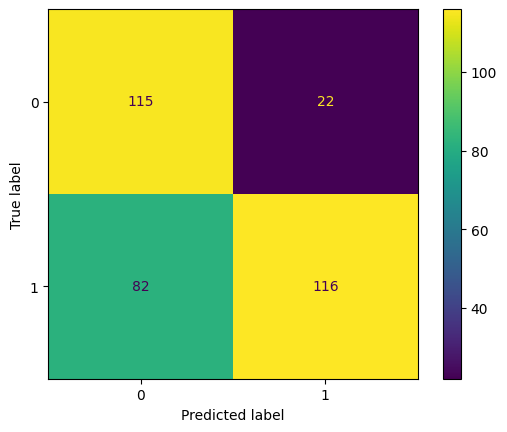

In [48]:
# Construct and display your confusion matrix.

# Construct the confusion matrix for your predicted and test values.

cm = metrics.confusion_matrix(y_test, y_pred)

# Create the display for your confusion matrix.

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb.classes_)

# Plot the visual in-line.

disp.plot()

In [ ]:
'''Question: What do you notice when observing your confusion matrix, and does this correlate to any of your other calculations?

The top left to bottom right diagonal in the confusion matrix represents the correct predictions, and the ratio of these squares showcases the accuracy.

The concentration of true positives stands out relative to false positives. This ratio is why the precision score is so high (0.8406).

True negatives and false negatives are closer in number, which explains the worse recall score.

Considerations
What are some key takeaways that you learned from this lab?

The evaluation of the model is important to inform if the model has delivered accurate predictions.
Splitting the data was important for ensuring that there was new data for the model to test its predictive performance.
Each metric provided an evaluation from a different standpoint, and accuracy alone was not a strong way to evaluate the model.
Effective assessments balance the true/false positives versus true/false negatives through the confusion matrix and F1 score.
How would you present your results to your team?

Showcase the data used to create the prediction and the performance of the model overall.
Review the sample output of the features and the confusion matrix to indicate the model's performance.
Highlight the metric values, emphasizing the F1 score.
How would you summarize your findings to stakeholders?

The model created provides some value in predicting an NBA player's chances of playing for five years or more.
Notably, the model performed better at predicting true positives than it did at predicting true negatives. In other words, it more accurately identified those players who will likely play for more than five years than it did those who likely will not.
'''